In [46]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [56]:
%matplotlib inline

secretnum= '1011101'
length=len(secretnum)
circuit=QuantumCircuit(length+1,length)


circuit.h(range(length))
circuit.x(length)
circuit.h(length)

circuit.barrier()

for i in range(length):
    if secretnum[i]=='1':
        circuit.cx(length-i-1,length)
        
circuit.barrier()

circuit.h(range(length))

circuit.measure(range(length),range(length))

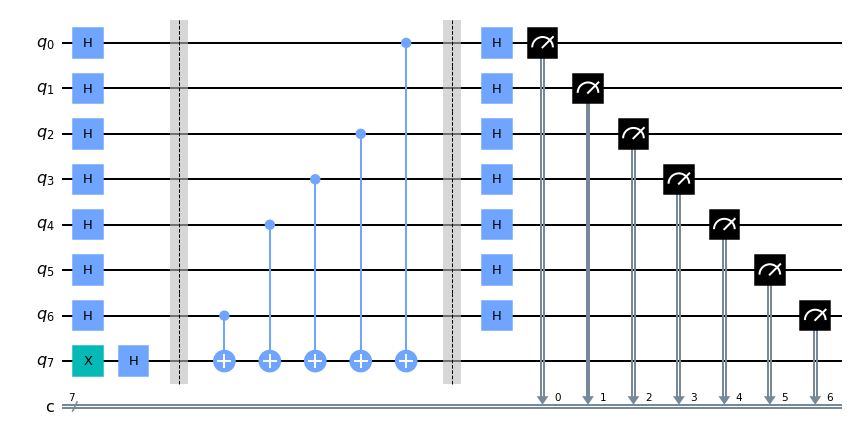

In [57]:
circuit.draw(output='mpl')

{'1011101': 1}


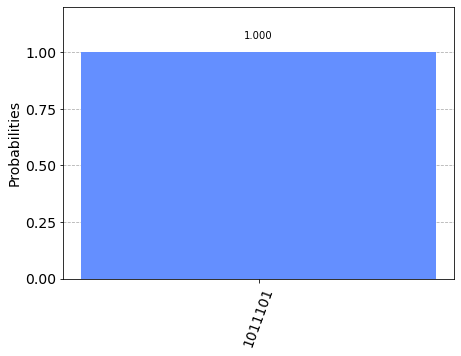

In [58]:
simulator = Aer.get_backend('qasm_simulator')
result= execute(circuit,backend=simulator,shots=1).result()
count=result.get_counts()
print(count)
plot_histogram(count)